Bank Marketing Data Set

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import math
import statistics
import scipy.stats
pd.set_option('display.max.columns',None)

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix

In [4]:
df = pd.read_csv('bank.csv')

print ('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


In [5]:
df = pd.read_csv('bank-full.csv')

print ('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


In [6]:
df = pd.read_csv('bank-full.csv')

print ('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


In [7]:
df = pd.read_csv('bank-additional-full.csv')

print ('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


In [8]:
data = pd.read_csv('bank-additional-full.csv', sep = ";")

In [9]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [10]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [11]:
data.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,239,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [12]:
data.shape

(41188, 21)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [14]:
listfeatures = ['job','marital','education','default','housing','loan','contact','month']
data[listfeatures].describe()

,job,marital,education,default,housing,loan,contact,month
count,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10
top,admin.,married,university.degree,no,yes,no,cellular,may
freq,10422,24928,12168,32588,21576,33950,26144,13769


In [15]:
for i in listfeatures:
    print(data[i].value_counts(),'\n')

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64 

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64 

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64 

no         32588
unknown     8597
yes            3
Name: default, dtype: int64 

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64 

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64 

cellular     26144
telephone    15044
Name: contact, dtype: int64 

may    13769
jul     717

In [16]:
print('total data after delete unused rows: ', len(data[(data['education']!='illiterate')& (data['marital']!='unknown') & (data['default']!='yes')][listfeatures]))

total data after delete unused rows:  41087


In [17]:
missing = df.isnull().sum()/len(df)*100

print(pd.DataFrame([missing[missing>0],pd.Series(df.isnull().sum()[df.isnull().sum()>1000])], index=['percent missing','how many missing']))

Empty DataFrame
Columns: []
Index: [percent missing, how many missing]


In [18]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [19]:
from sklearn.preprocessing import LabelEncoder
y = data['y'].values
print('data y sebelum konversi: ',y)
label_y_encoder = LabelEncoder().fit(y)
y_konversi = label_y_encoder.transform(y)
print('data y setelah konversi: ',y_konversi)
print('class before transform: ',label_y_encoder.classes_)

data y sebelum konversi:  ['no' 'no' 'no' ... 'no' 'yes' 'no']
data y setelah konversi:  [0 0 0 ... 0 1 0]
class before transform:  ['no' 'yes']


In [20]:
data_job = data['job'].values
print('data job 1 sebelum konversi: ',data_job)
label_datajob_encoder = LabelEncoder().fit(data_job)
data_job_konversi = label_datajob_encoder.transform(data_job)
print('data feature job setelah konversi: ',data_job_konversi)
print('class before transform: ',label_datajob_encoder.classes_)

data_marital = data['marital'].values
print('data marital 1 sebelum konversi: ',data_marital)
label_datamarital_encoder = LabelEncoder().fit(data_marital)
data_marital_konversi = label_datamarital_encoder.transform(data_marital)
print('data feature marital setelah konversi: ',data_marital_konversi)
print('class before transform: ',label_datamarital_encoder.classes_)


data_education = data['education'].values
print('data education 1 sebelum konversi: ',data_education)
label_dataeducation_encoder = LabelEncoder().fit(data_education)
data_education_konversi = label_dataeducation_encoder.transform(data_education)
print('data feature education setelah konversi: ',data_education_konversi)
print('class before transform: ',label_dataeducation_encoder.classes_)


data_default = data['default'].values
print('data default 1 sebelum konversi: ',data_default)
label_datadefault_encoder = LabelEncoder().fit(data_default)
data_default_konversi = label_datadefault_encoder.transform(data_default)
print('data feature default setelah konversi: ',data_default_konversi)
print('class before transform: ',label_datadefault_encoder.classes_)


data_housing = data['housing'].values
print('data housing 1 sebelum konversi: ',data_housing)
label_datahousing_encoder = LabelEncoder().fit(data_housing)
data_housing_konversi = label_datahousing_encoder.transform(data_housing)
print('data feature housing setelah konversi: ',data_housing_konversi)
print('class before transform: ',label_datahousing_encoder.classes_)


data_loan = data['loan'].values
print('data loan 1 sebelum konversi: ',data_loan)
label_dataloan_encoder = LabelEncoder().fit(data_loan)
data_loan_konversi = label_dataloan_encoder.transform(data_loan)
print('data feature loan setelah konversi: ',data_loan_konversi)
print('class before transform: ',label_dataloan_encoder.classes_)

data_contact = data['contact'].values
print('data contact 1 sebelum konversi: ',data_contact)
label_datacontact_encoder = LabelEncoder().fit(data_contact)
data_contact_konversi = label_datacontact_encoder.transform(data_contact)
print('data feature contact setelah konversi: ',data_contact_konversi)
print('class before transform: ',label_datacontact_encoder.classes_)

data_month = data['month'].values
print('data month 1 sebelum konversi: ',data_month)
label_datamonth_encoder = LabelEncoder().fit(data_month)
data_month_konversi = label_datamonth_encoder.transform(data_month)
print('data feature month setelah konversi: ',data_month_konversi)
print('class before transform: ',label_datamonth_encoder.classes_)

data job 1 sebelum konversi:  ['housemaid' 'services' 'services' ... 'retired' 'technician' 'retired']
data feature job setelah konversi:  [3 7 7 ... 5 9 5]
class before transform:  ['admin.' 'blue-collar' 'entrepreneur' 'housemaid' 'management' 'retired'
 'self-employed' 'services' 'student' 'technician' 'unemployed' 'unknown']
data marital 1 sebelum konversi:  ['married' 'married' 'married' ... 'married' 'married' 'married']
data feature marital setelah konversi:  [1 1 1 ... 1 1 1]
class before transform:  ['divorced' 'married' 'single' 'unknown']
data education 1 sebelum konversi:  ['basic.4y' 'high.school' 'high.school' ... 'university.degree'
 'professional.course' 'professional.course']
data feature education setelah konversi:  [0 3 3 ... 6 5 5]
class before transform:  ['basic.4y' 'basic.6y' 'basic.9y' 'high.school' 'illiterate'
 'professional.course' 'university.degree' 'unknown']
data default 1 sebelum konversi:  ['no' 'unknown' 'no' ... 'no' 'no' 'no']
data feature default se

In [21]:
df['y_konversi'] = y_konversi
df['data_job_konversi'] = data_job_konversi
df['data_marital_konversi'] = data_marital_konversi
df['data_education_konversi'] = data_education_konversi
df['data_default_konversi'] = data_default_konversi
df['data_housing_konversi'] = data_housing_konversi
df['data_loan_konversi'] = data_loan_konversi
df['data_contact_konversi'] = data_contact_konversi
df['data_month_konversi'] = data_month_konversi
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


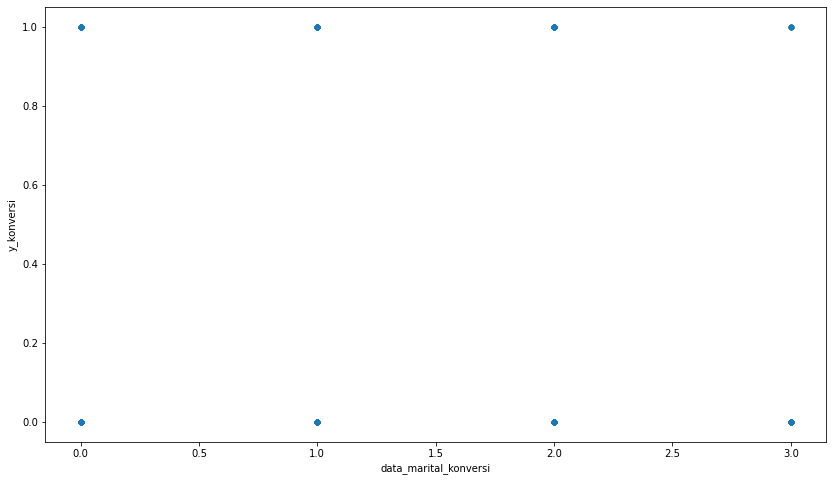

In [22]:
df_job_target = df[['y_konversi','data_marital_konversi']]
df_job_target.plot(kind='scatter', x='data_marital_konversi', y='y_konversi', figsize=(14,8))
plt.show()

In [23]:
df.groupby(by=['y_konversi'])['data_marital_konversi'].count()

y_konversi
0    36548
1     4640
Name: data_marital_konversi, dtype: int64

In [24]:
df.groupby(by=['y_konversi','data_marital_konversi'])['data_marital_konversi'].count()

y_konversi  data_marital_konversi
0           0                         4136
            1                        22396
            2                         9948
            3                           68
1           0                          476
            1                         2532
            2                         1620
            3                           12
Name: data_marital_konversi, dtype: int64

In [25]:
job_konv_group = data.groupby(by=['marital','y'])['marital'].count()
job_konv_group

marital   y  
divorced  no      4136
          yes      476
married   no     22396
          yes     2532
single    no      9948
          yes     1620
unknown   no        68
          yes       12
Name: marital, dtype: int64

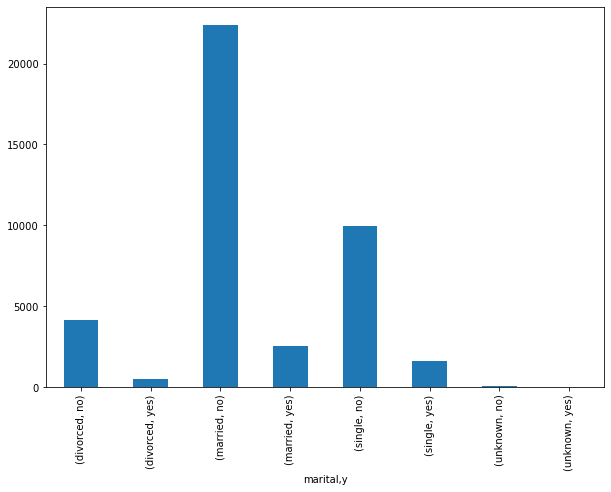

In [26]:
job_konv_group.plot(kind='bar',figsize=(10,7))
plt.show()

In [27]:
data_feature= df[['data_job_konversi']].values
print('data feature:',data_feature )
print('shape data feature:',data_feature.shape )

target_y_konversi = df[['y_konversi']].values.reshape(len(y_konversi))
print('data y:',target_y_konversi )
print('shape data y:',target_y_konversi.shape )

data feature: [[3]
 [7]
 [7]
 ...
 [5]
 [9]
 [5]]
shape data feature: (41188, 1)
data y: [0 0 0 ... 0 1 0]
shape data y: (41188,)


In [28]:
data_4feature = df[['data_job_konversi', 'data_marital_konversi', 'data_loan_konversi', 'data_contact_konversi']].values
print('data 4feature:',data_4feature )
print('shape data 4feature:',data_4feature.shape )

target_y_konversi_4f = df[['y_konversi']].values.reshape(len(y_konversi))
print('data y:',target_y_konversi )
print('shape data y:',target_y_konversi.shape )

data 4feature: [[3 1 0 1]
 [7 1 0 1]
 [7 1 0 1]
 ...
 [5 1 0 0]
 [9 1 0 0]
 [5 1 0 0]]
shape data 4feature: (41188, 4)
data y: [0 0 0 ... 0 1 0]
shape data y: (41188,)


In [29]:
data_8feature = df[['data_job_konversi','data_marital_konversi','data_education_konversi','data_default_konversi','data_housing_konversi','data_loan_konversi','data_contact_konversi', 'data_month_konversi']].values
print('data 8 feature:',data_8feature )
print('shape data 8 feature:',data_8feature.shape )

target_y_konversi_8f = df[['y_konversi']].values.reshape(len(y_konversi))
print('data y:',target_y_konversi )
print('shape data y:',target_y_konversi.shape )

data 8 feature: [[3 1 0 ... 0 1 6]
 [7 1 3 ... 0 1 6]
 [7 1 3 ... 0 1 6]
 ...
 [5 1 6 ... 0 0 7]
 [9 1 5 ... 0 0 7]
 [5 1 5 ... 0 0 7]]
shape data 8 feature: (41188, 8)
data y: [0 0 0 ... 0 1 0]
shape data y: (41188,)


In [30]:
from sklearn.neighbors import KNeighborsClassifier

model_ykonv_4f = KNeighborsClassifier(n_neighbors=5).fit(data_4feature,target_y_konversi_4f)

model_ykonv_8f = KNeighborsClassifier(n_neighbors=5).fit(data_8feature,target_y_konversi_8f)

In [31]:
prediksi_ykonv_4f = model_ykonv_4f.predict(data_4feature)
print(prediksi_ykonv_4f)


prediksi_ykonv_8f = model_ykonv_8f.predict(data_8feature)
print(prediksi_ykonv_8f)

[0 0 0 ... 0 1 0]
[0 0 0 ... 0 0 0]


In [32]:
performance_model_4f = model_ykonv_4f.score(data_4feature,target_y_konversi_4f)
print('performance model 4 features : ',performance_model_4f)

performance_model_8f = model_ykonv_8f.score(data_8feature,target_y_konversi_8f)
print('performance model 8 features : ',performance_model_8f)

performance model 4 features :  0.8463630183548606
performance model 8 features :  0.8871515975526852


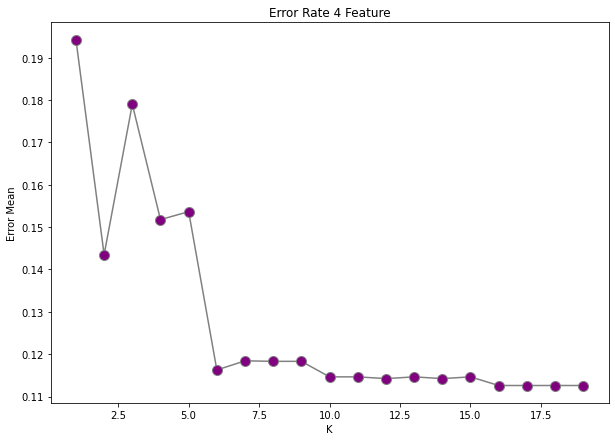

In [33]:
error_4f = []
neighbors_loop = range(1,20)
for x in neighbors_loop:
    model_ykonv_4f_loop = KNeighborsClassifier(n_neighbors=x).fit(data_4feature,target_y_konversi_4f)
    prediksi_ykonv_4f_loop = model_ykonv_4f_loop.predict(data_4feature)
    error_4f.append(np.mean(prediksi_ykonv_4f_loop!=target_y_konversi_4f))
plt.figure(figsize=(10,7))
plt.plot(neighbors_loop,error_4f, color = 'grey', linestyle = 'solid', marker='o',markerfacecolor='purple', markersize=10)
plt.title('Error Rate 4 Feature')
plt.xlabel('K')
plt.ylabel('Error Mean')
plt.show()

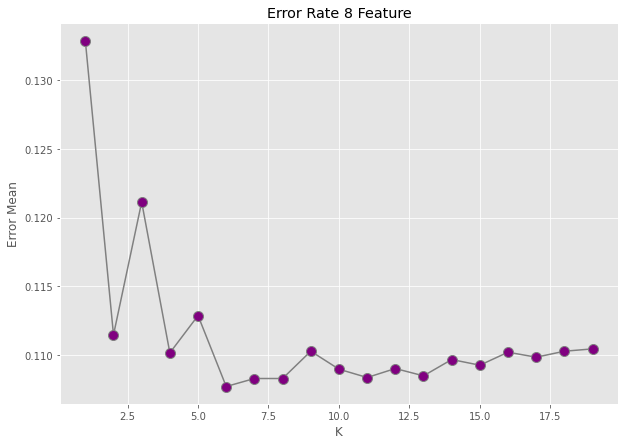

In [48]:
error_8f = []
neighbors_loop = range(1,20)
for x in neighbors_loop:
    model_ykonv_8f_loop = KNeighborsClassifier(n_neighbors=x).fit(data_8feature,target_y_konversi_8f)
    prediksi_ykonv_8f_loop = model_ykonv_8f_loop.predict(data_8feature)
    error_8f.append(np.mean(prediksi_ykonv_8f_loop!=target_y_konversi_8f))
plt.figure(figsize=(10,7))
plt.plot(neighbors_loop,error_8f, color = 'grey', linestyle = 'solid', marker='o',markerfacecolor='purple', markersize=10)
plt.title('Error Rate 8 Feature')
plt.xlabel('K')
plt.ylabel('Error Mean')
plt.show()

In [35]:
from sklearn.model_selection import train_test_split
features_data = df[['data_job_konversi', 'data_marital_konversi', 'data_loan_konversi', 'data_contact_konversi']].values
target_data = df[['y_konversi']].values.reshape(-1,1)

x_4f_train,x_4f_test,y_4f_train,y_4f_test = train_test_split(features_data,target_data,test_size=0.5)
y_4f_test = y_4f_test.reshape(len(y_4f_test))
y_4f_train = y_4f_train.reshape(len(y_4f_train))
print('shape feature total: ', features_data.shape)
print('shape feature train: ', x_4f_train.shape)
print('shape feature test: ', x_4f_test.shape)
print('shape target test: ', y_4f_test.shape)

shape feature total:  (41188, 4)
shape feature train:  (20594, 4)
shape feature test:  (20594, 4)
shape target test:  (20594,)


In [36]:
features_8f_data = df[['data_job_konversi','data_marital_konversi','data_education_konversi','data_default_konversi','data_housing_konversi','data_loan_konversi','data_contact_konversi', 'data_month_konversi']].values
target_8f_data = df[['y_konversi']].values.reshape(-1,1)

x_8f_train,x_8f_test,y_8f_train,y_8f_test = train_test_split(features_8f_data,target_8f_data,test_size=0.5)
y_8f_test = y_8f_test.reshape(len(y_8f_test))
y_8f_train = y_8f_train.reshape(len(y_8f_train))
print('shape feature total: ', features_8f_data.shape)
print('shape feature train: ', x_8f_train.shape)
print('shape feature test: ', x_8f_test.shape)
print('shape target test: ', y_8f_test.shape)

shape feature total:  (41188, 8)
shape feature train:  (20594, 8)
shape feature test:  (20594, 8)
shape target test:  (20594,)


In [37]:
from sklearn.naive_bayes import GaussianNB
model_4f_GNB = GaussianNB().fit(x_4f_train,y_4f_train)
model_8f_GNB = GaussianNB().fit(x_8f_train,y_8f_train)

In [38]:
y_4f_train_prediksi_GNB = model_4f_GNB.predict(x_4f_train)
print(y_4f_train_prediksi_GNB)


y_8f_train_prediksi_GNB = model_8f_GNB.predict(x_8f_train)
print(y_8f_train_prediksi_GNB)

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


In [39]:
perf_model_4f_GNB = model_4f_GNB.score(x_4f_train,y_4f_train)
print('performance model 4 features GNB : ',perf_model_4f_GNB)


perf_model_8f_GNB = model_8f_GNB.score(x_8f_train,y_8f_train)
print('performance model 8 features GNB : ',perf_model_8f_GNB)

performance model 4 features GNB :  0.8889482373506846
performance model 8 features GNB :  0.8859862095756046


In [40]:
conf_matrix_4f_GNB = confusion_matrix(y_4f_train,y_4f_train_prediksi_GNB)
print(conf_matrix_4f_GNB)

conf_matrix_8f_GNB = confusion_matrix(y_8f_train,y_8f_train_prediksi_GNB)
print(conf_matrix_8f_GNB)

[[18307     0]
 [ 2287     0]]
[[18246     2]
 [ 2346     0]]


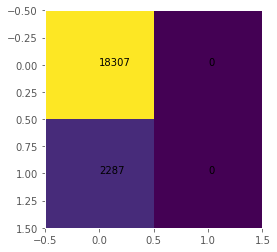

In [41]:
mpl.style.use(['ggplot'])
fig,ax = plt.subplots(figsize=(4,4))
ax.imshow (conf_matrix_4f_GNB)
ax.grid(False)
for i in range (len(conf_matrix_4f_GNB[0])):
    for j in range (len(conf_matrix_4f_GNB[0])):
        ax.text(j,i,conf_matrix_4f_GNB[i,j])
plt.show()

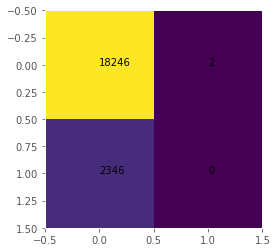

In [42]:
mpl.style.use(['ggplot'])
fig,ax = plt.subplots(figsize=(4,4))
ax.imshow (conf_matrix_8f_GNB)
ax.grid(False)
for i in range (len(conf_matrix_8f_GNB[0])):
    for j in range (len(conf_matrix_8f_GNB[0])):
        ax.text(j,i,conf_matrix_8f_GNB[i,j])
plt.show()

In [43]:
from sklearn.ensemble import RandomForestClassifier
model_4f_RF = RandomForestClassifier().fit(x_4f_train,y_4f_train)


model_8f_RF = RandomForestClassifier().fit(x_8f_train,y_8f_train)

In [44]:
y_train_prediksi_4f_RF = model_4f_RF.predict(x_4f_train)
print(y_train_prediksi_4f_RF)


y_train_prediksi_8f_RF = model_8f_RF.predict(x_8f_train)
print(y_train_prediksi_8f_RF)

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


In [45]:
perf_model_4f_RF = model_4f_RF.score(x_4f_train,y_4f_train)
print('performance model RF 4 features : ',perf_model_4f_RF)


perf_model_8f_RF = model_8f_RF.score(x_8f_train,y_8f_train)
print('performance model RF 8 features : ',perf_model_8f_RF)

performance model RF 4 features :  0.8891424686801981
performance model RF 8 features :  0.9189569777605128


In [46]:
conf_matrix_4f_RF = confusion_matrix(y_4f_train,y_train_prediksi_4f_RF)
print(conf_matrix_4f_RF)
conf_matrix_8f_RF = confusion_matrix(y_8f_train,y_train_prediksi_8f_RF)
print(conf_matrix_8f_RF)

[[18298     9]
 [ 2274    13]]
[[18077   171]
 [ 1498   848]]


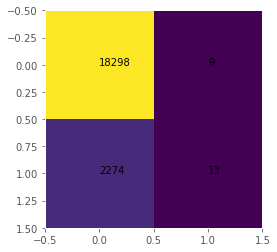

In [47]:
mpl.style.use(['ggplot'])
fig,ax = plt.subplots(figsize=(4,4))
ax.imshow (conf_matrix_4f_RF)
ax.grid(False)
for i in range (len(conf_matrix_4f_RF[0])):
    for j in range (len(conf_matrix_4f_RF[0])):
        ax.text(j,i,conf_matrix_4f_RF[i,j])
plt.show()

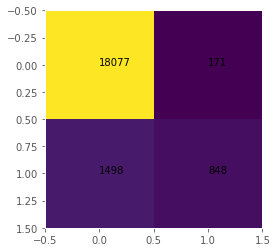

In [49]:
mpl.style.use(['ggplot'])
fig,ax = plt.subplots(figsize=(4,4))
ax.imshow (conf_matrix_8f_RF)
ax.grid(False)
for i in range (len(conf_matrix_8f_RF[0])):
    for j in range (len(conf_matrix_8f_RF[0])):
        ax.text(j,i,conf_matrix_8f_RF[i,j])
plt.show()

In [50]:
from sklearn.tree import DecisionTreeClassifier
model_4f_DT = DecisionTreeClassifier().fit(x_4f_train,y_4f_train)


model_8f_DT = DecisionTreeClassifier().fit(x_8f_train,y_8f_train)

In [51]:
y_train_prediksi_4f_DT = model_4f_DT.predict(x_4f_train)
print(y_train_prediksi_4f_DT)
y_train_prediksi_8f_DT = model_8f_DT.predict(x_8f_train)
print(y_train_prediksi_8f_DT)

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


In [52]:
perf_model_4f_DT = model_4f_DT.score(x_4f_train,y_4f_train)
print('performance model DT 4 features: ',perf_model_4f_DT)
perf_model_8f_DT = model_8f_DT.score(x_8f_train,y_8f_train)
print('performance model DT 8 features: ',perf_model_8f_DT)

performance model DT 4 features:  0.8891424686801981
performance model DT 8 features:  0.9189569777605128


In [53]:
conf_matrix_4f_DT = confusion_matrix(y_4f_train,y_train_prediksi_4f_DT)
print(conf_matrix_4f_DT)
conf_matrix_8f_DT = confusion_matrix(y_8f_train,y_train_prediksi_8f_DT)
print(conf_matrix_8f_DT)

[[18298     9]
 [ 2274    13]]
[[18136   112]
 [ 1557   789]]


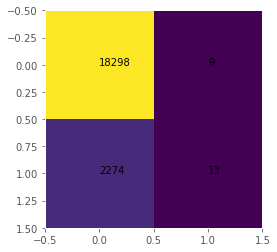

In [54]:
mpl.style.use(['ggplot'])
fig,ax = plt.subplots(figsize=(4,4))
ax.imshow (conf_matrix_4f_DT)
ax.grid(False)
for i in range (len(conf_matrix_4f_DT[0])):
    for j in range (len(conf_matrix_4f_DT[0])):
        ax.text(j,i,conf_matrix_4f_DT[i,j])
plt.show()

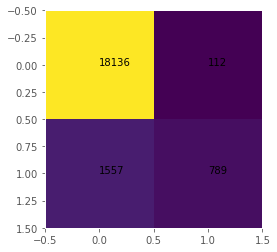

In [55]:
mpl.style.use(['ggplot'])
fig,ax = plt.subplots(figsize=(4,4))
ax.imshow (conf_matrix_8f_DT)
ax.grid(False)
for i in range (len(conf_matrix_8f_DT[0])):
    for j in range (len(conf_matrix_8f_DT[0])):
        ax.text(j,i,conf_matrix_8f_DT[i,j])
plt.show()

In [56]:
rekap_score_4f = {'Model':['k-NN', 'Gaussian Naive Bayes', 'Random Forest', 'Decision Tree'], 
        'Score':[performance_model_4f, perf_model_4f_GNB, perf_model_4f_RF, perf_model_4f_DT]} 
output_rekap_score_4f = pd.DataFrame(rekap_score_4f)
output_rekap_score_4f

,Model,Score
0,k-NN,0.846363
1,Gaussian Naive Bayes,0.888948
2,Random Forest,0.889142
3,Decision Tree,0.889142


In [57]:
rekap_score_8f = {'Model':['k-NN', 'Gaussian Naive Bayes', 'Random Forest', 'Decision Tree'], 
        'Score':[performance_model_8f, perf_model_8f_GNB, perf_model_8f_RF, perf_model_8f_DT]} 
output_rekap_score_8f = pd.DataFrame(rekap_score_8f)
output_rekap_score_8f

,Model,Score
0,k-NN,0.887152
1,Gaussian Naive Bayes,0.885986
2,Random Forest,0.918957
3,Decision Tree,0.918957


Model terbaik yang dapat digunakan adalah random forest dan decision tree. hasil menunjukkan bahwa penggunaan 4 feature maupun 8 feature menghasilkan output yang sama yaitu model random forest dan decision tree dengan nilai score tertinggi.